<a href="https://colab.research.google.com/github/BDouchet/Spotify_dataset/blob/main/popularity_regression/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from zipfile import ZipFile

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id='16phKfXvRrwGbOJrNKpgbYnBnZG6icXFX'

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('dataset.zip')

with ZipFile('dataset.zip', 'r') as zip:
   zip.extractall()
   print('Done')

df=pd.read_csv('dataset/Spotify_exo2.csv')

X=df.drop(['genres','popularity'],axis=1).to_numpy()
Y=df['popularity'].to_numpy()

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=10,test_size=0.2)

print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

Done
(2378, 12) (2378,) (595, 12) (595,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [ ]:
rd = RandomForestRegressor(n_estimators=200,criterion='mse')

rd.fit(X_train,Y_train)

y_pred = rd.predict(X_test)

print(r2_score(Y_test,y_pred))

scores = cross_val_score(rd,X,Y,cv=10,scoring=make_scorer(r2_score))
print(np.mean(scores))

0.5345975482290353
0.5655174208345404


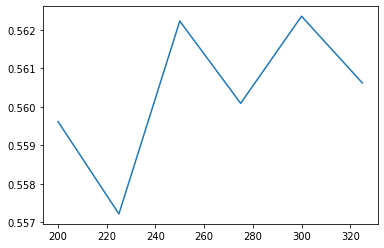

In [ ]:
# Test n_estimators

x = np.arange(200,350,25)
y = []

for val in x:
  rd = RandomForestRegressor(n_estimators=val)
  score = np.mean(cross_val_score(rd,X,Y,cv=5,scoring=make_scorer(r2_score))
  y.append(score)


plt.plot(x,y)
plt.show()

In [ ]:
#Criterion comparaison

rd = RandomForestRegressor(n_estimators=250, criterion='mse')
mse = np.mean(cross_val_score(rd,X,Y,cv=10,scoring=make_scorer(r2_score)))

rd = RandomForestRegressor(n_estimators=250, criterion='mae')
mae = np.mean(cross_val_score(rd,X,Y,cv=10,scoring=make_scorer(r2_score)))

print("Criterion MSE: {0}".format(mse))
print("Criterion MAE: {0}".format(mae))

Criterion MSE: 0.5684879395978294
Criterion MAE: 0.5611399844515644


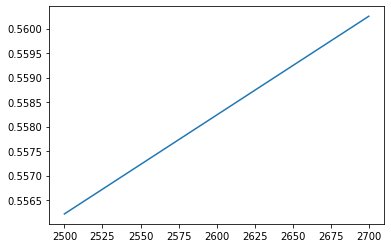

In [ ]:
rd = RandomForestRegressor(n_estimators=250, criterion='mse')

In [ ]:
X.shape

(2973, 12)